# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [ ]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 27.7 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=07a8fd751ba3975d8ef6fb4420f94ad4688c0bad3654c02d7398bb9fa0f3b24f
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

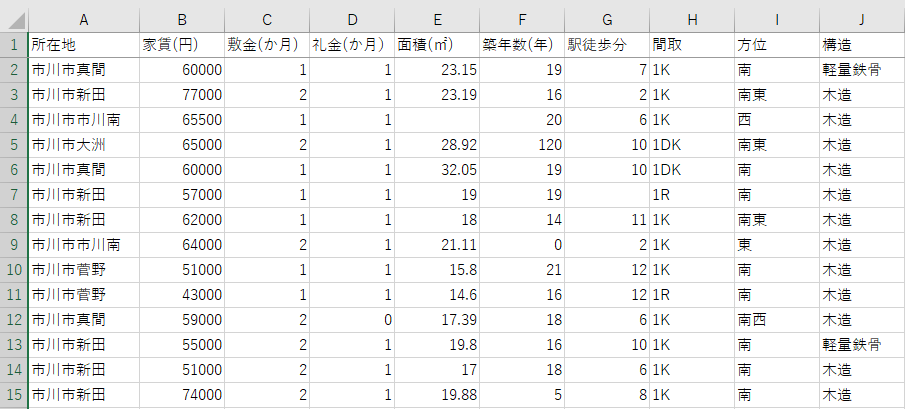

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [10]:
import pandas as pd

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [14]:
df = pd.read_csv('house_rent.csv', encoding='cp932')

## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [18]:
df.head() , df.tail()

(      所在地  家賃(円)  敷金(か月)  礼金(か月）  面積(㎡)  築年数(年)  駅徒歩分   間取  方位    構造
 0   市川市真間  60000       1     1.0  23.15    19.0   7.0   1K   南  軽量鉄骨
 1   市川市新田  77000       2     1.0  23.19    16.0   2.0   1K  南東    木造
 2  市川市市川南  65500       1     1.0    NaN    20.0   6.0   1K   西    木造
 3   市川市大洲  65000       2     1.0  28.92   120.0  10.0  1DK  南東    木造
 4   市川市真間  60000       1     1.0  32.05    19.0  10.0  1DK   南    木造,
        所在地  家賃(円)  敷金(か月)  礼金(か月）  面積(㎡)  築年数(年)  駅徒歩分  間取  方位    構造
 299  市川市新田  64000       2     1.0  22.01     NaN   5.0  1R   南    木造
 300  市川市新田  52000       1     0.0  18.02    25.0  13.0  1K  南東  軽量鉄骨
 301  市川市新田  57000       1     1.0  21.70    20.0  10.0  1K   南    木造
 302  市川市真間  60000       1     1.0  20.37    13.0  14.0  1K   西   鉄骨造
 303  市川市新田  72000       2     1.0  20.70     0.0   2.0  1K   東   鉄骨造)

## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [19]:
print(df.columns)
print(df['家賃(円)'].value_counts())
print(df['所在地'].value_counts())
print(df['敷金(か月)'].value_counts())
print(df['方位'].value_counts())
print(df['構造'].value_counts())
print(df['礼金(か月）'].value_counts())
print(df['築年数(年)'].value_counts())
print(df['間取'].value_counts())
print(df['面積(㎡)'].value_counts())
print(df['駅徒歩分'].value_counts())

Index(['所在地', '家賃(円)', '敷金(か月)', '礼金(か月）', '面積(㎡)', '築年数(年)', '駅徒歩分', '間取',
       '方位', '構造'],
      dtype='object')
60000    22
72000    18
55000    16
58000    16
67000    15
61000    14
65000    14
52000    13
57000    12
56000    12
59000    11
50000    10
51000    10
63000    10
62000     9
64000     8
70000     8
66000     7
73000     5
69000     5
53000     5
77000     5
49000     4
55500     4
56500     3
48000     3
54000     3
45000     3
54500     3
71000     3
47000     3
74000     3
35000     2
62500     2
36000     2
46000     2
44000     1
83000     1
75000     1
26000     1
25000     1
72500     1
36500     1
86000     1
42000     1
68000     1
82000     1
65500     1
43000     1
50500     1
76000     1
39000     1
64500     1
61500     1
57500     1
Name: 家賃(円), dtype: int64
市川市新田     104
市川市市川南     74
市川市真間      42
市川市大洲      30
市川市市川      26
市川市菅野      20
市川市須和田      3
市川市平田       3
市川市大町       1
市川市大和田      1
Name: 所在地, dtype: int64
2    166
1    129
0      9
Name:

## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [20]:
male1 = pd.get_dummies(df['間取'], drop_first = True)
male2 = pd.get_dummies(df['方位'], drop_first = True)
male3 = pd.get_dummies(df['所在地'], drop_first = True)
male4 = pd.get_dummies(df['構造'], drop_first = True)
df2 = pd.concat([df,male1],axis=1)
df3 = pd.concat([df2,male2],axis=1)
df4 = pd.concat([df3,male3],axis=1)
df5 = pd.concat([df4,male4],axis=1)

df5.head()

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造,1K,1R,北東,南,南東,南西,東,西,市川市大洲,市川市大町,市川市市川,市川市市川南,市川市平田,市川市新田,市川市真間,市川市菅野,市川市須和田,軽量鉄骨,鉄骨造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(df5,test_size = 0.2,random_state=0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [23]:
from numpy.lib.function_base import average

print(x_train.isnull().sum())

x_train['面積(㎡)'] = x_train['面積(㎡)'].mean()
x_train['築年数(年)'] = x_train['築年数(年)'].mean()
x_train['駅徒歩分'] = x_train['駅徒歩分'].mean()

x_train.head()


所在地       0
家賃(円)     0
敷金(か月)    0
礼金(か月）    0
面積(㎡)     0
築年数(年)    0
駅徒歩分      0
間取        0
方位        0
構造        0
1K        0
1R        0
北東        0
南         0
南東        0
南西        0
東         0
西         0
市川市大洲     0
市川市大町     0
市川市市川     0
市川市市川南    0
市川市平田     0
市川市新田     0
市川市真間     0
市川市菅野     0
市川市須和田    0
軽量鉄骨      0
鉄骨造       0
dtype: int64


,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造,1K,1R,北東,南,南東,南西,東,西,市川市大洲,市川市大町,市川市市川,市川市市川南,市川市平田,市川市新田,市川市真間,市川市菅野,市川市須和田,軽量鉄骨,鉄骨造
176,市川市市川南,69000,2,1.0,21.901074,16.690083,8.020661,1K,西,鉄骨造,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
26,市川市新田,70000,2,2.0,21.901074,16.690083,8.020661,1DK,南,木造,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
74,市川市大洲,65000,2,1.0,21.901074,16.690083,8.020661,1DK,南東,木造,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
101,市川市市川,51000,1,1.0,21.901074,16.690083,8.020661,1K,南,木造,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
154,市川市新田,72000,2,1.0,21.901074,16.690083,8.020661,1K,東,木造,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarnin

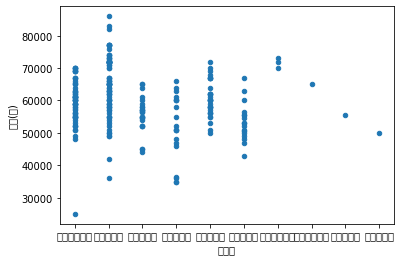

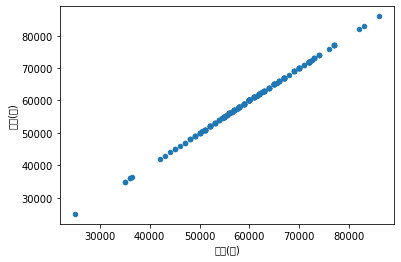

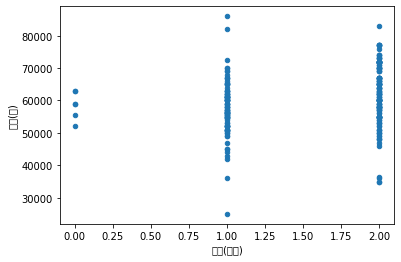

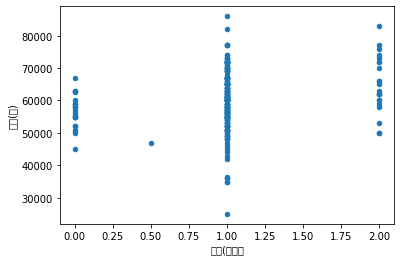

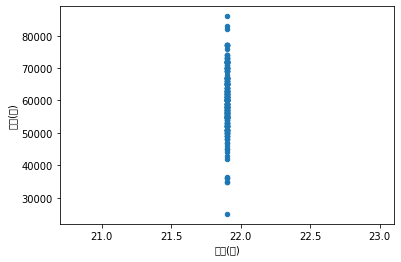

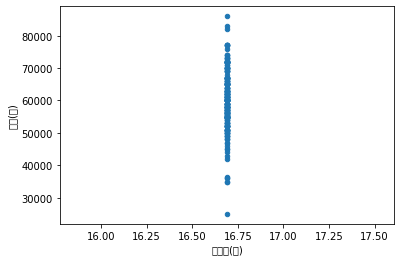

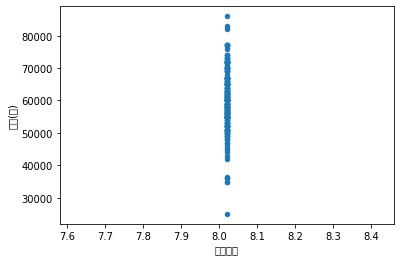

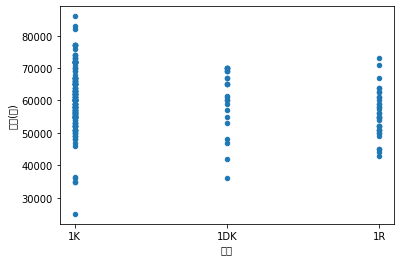

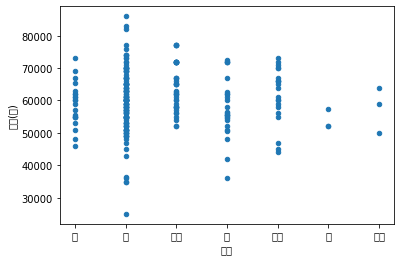

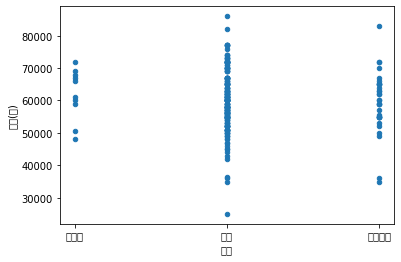

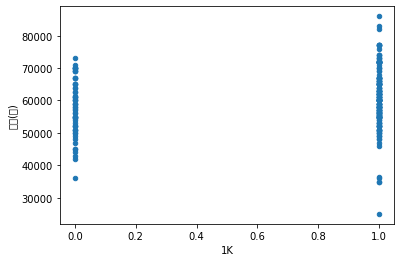

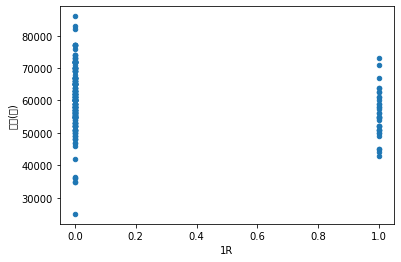

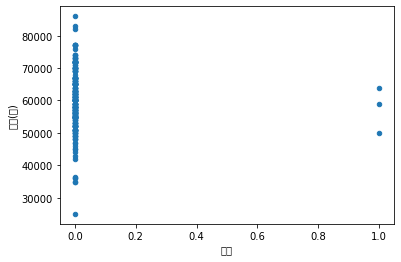

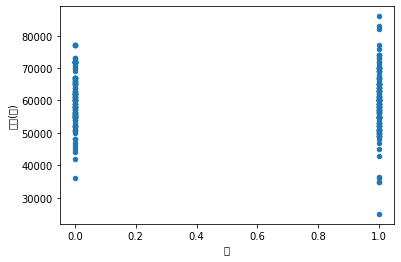

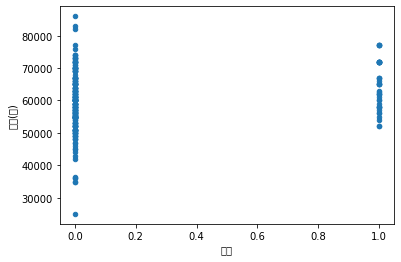

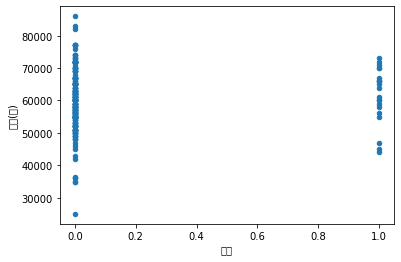

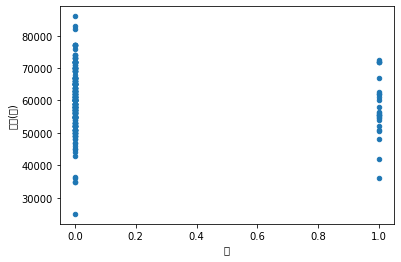

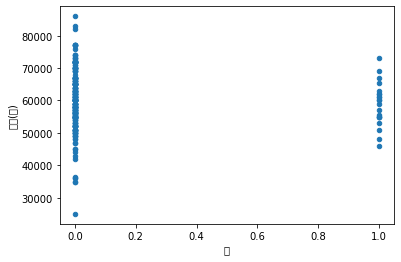

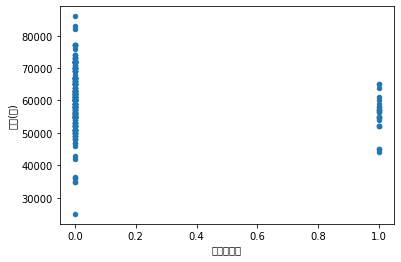

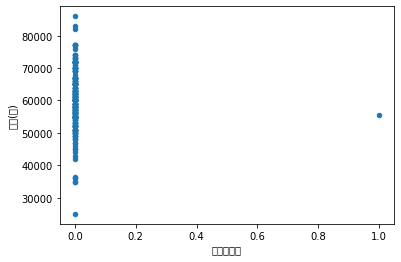

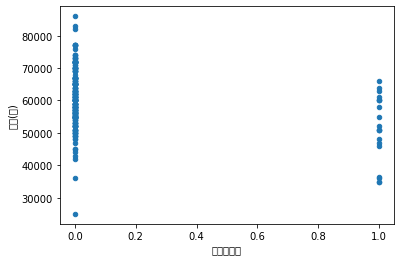

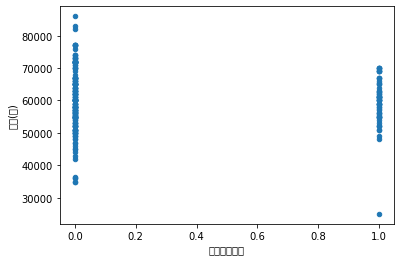

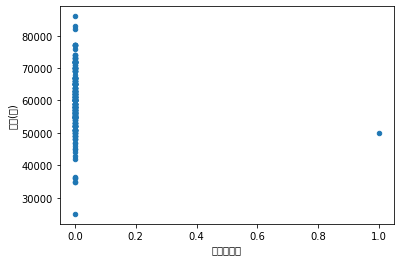

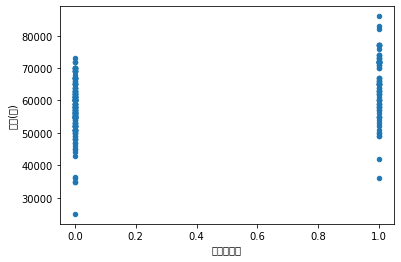

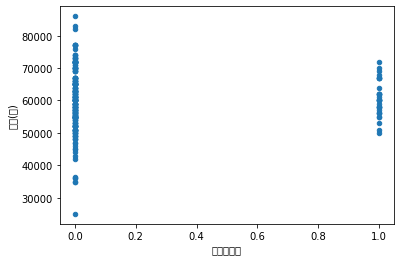

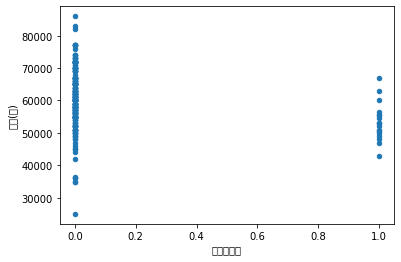

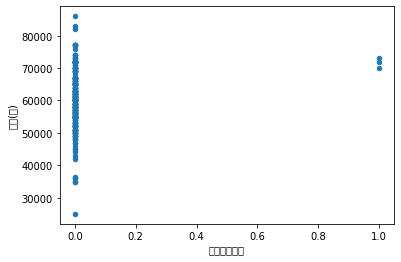

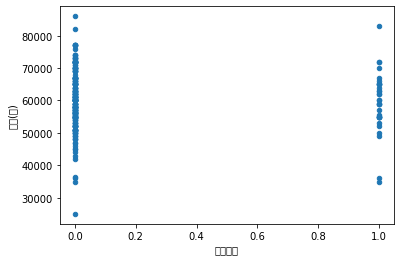

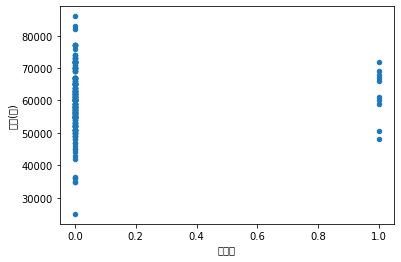

In [26]:
x_train.isnull().sum()
%matplotlib inline
col = x_train.columns
for name in x_train:
  x_train.plot(kind='scatter',x = name, y = '家賃(円)')


## 問題９　外れ値処理の結果を表示してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarnin

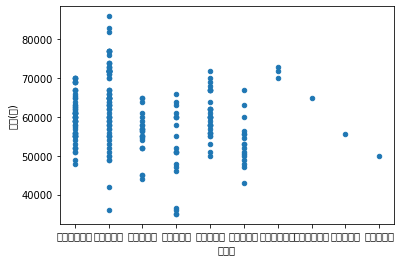

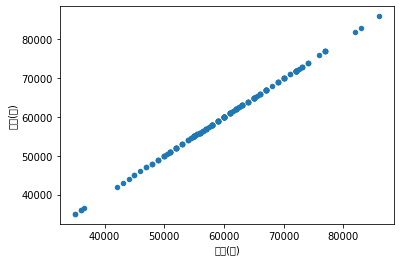

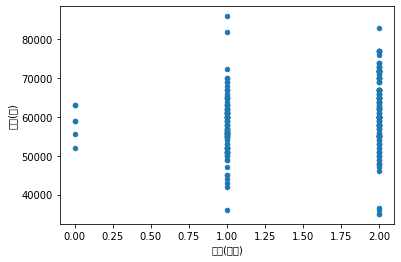

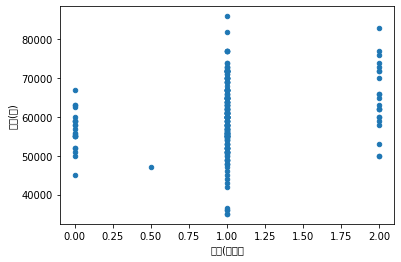

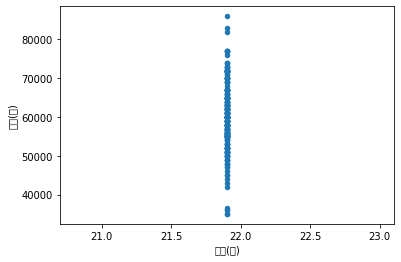

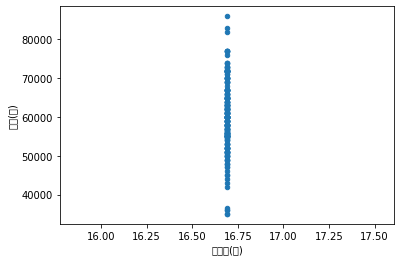

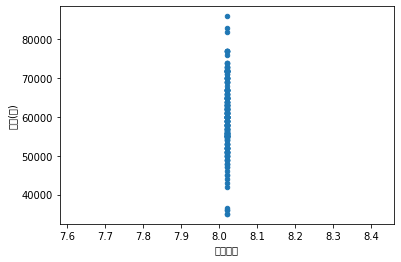

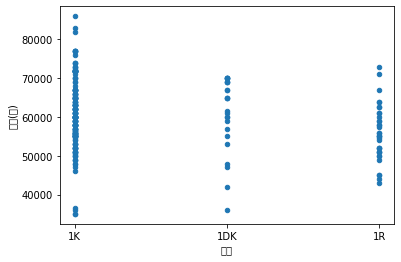

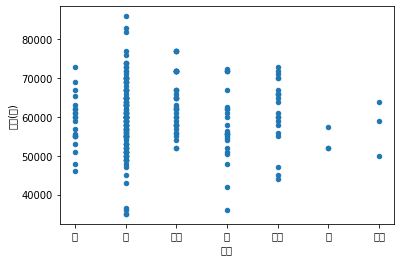

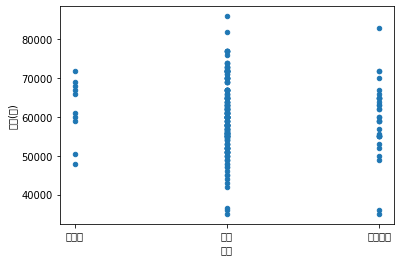

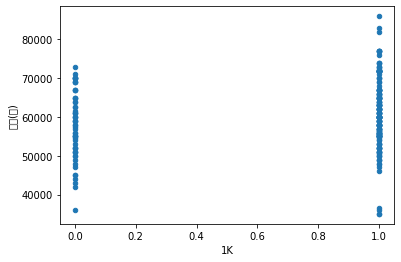

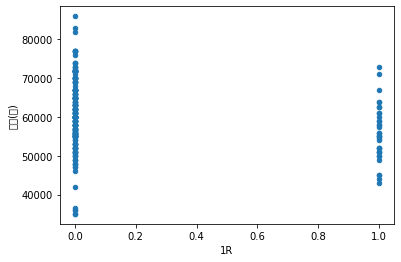

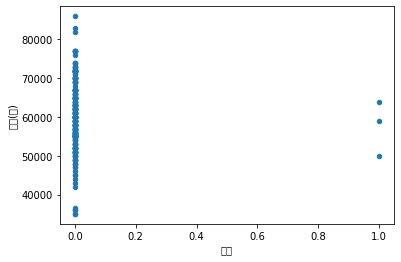

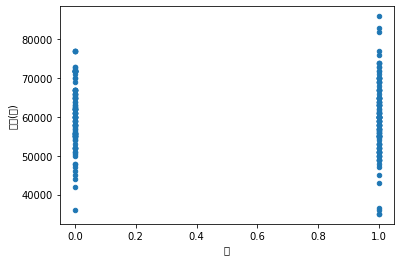

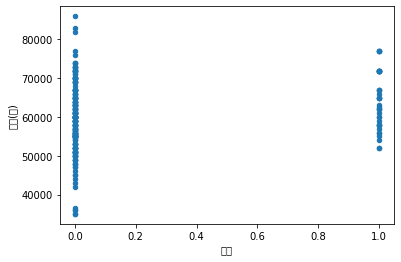

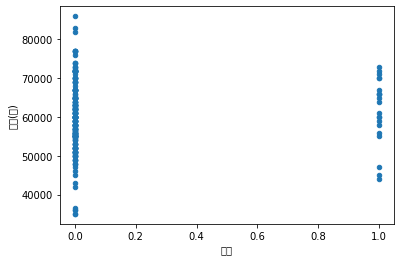

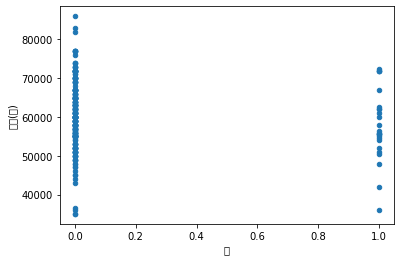

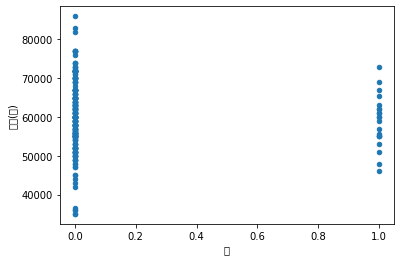

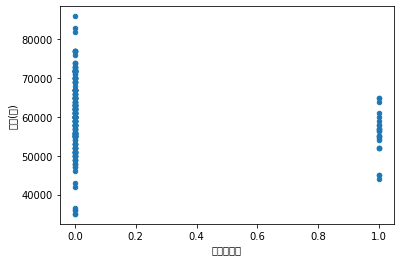

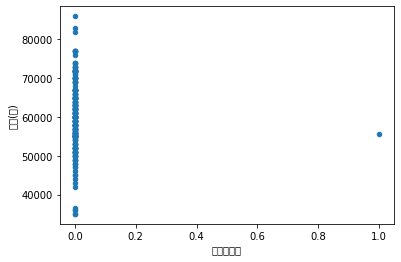

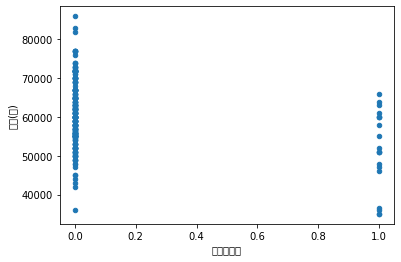

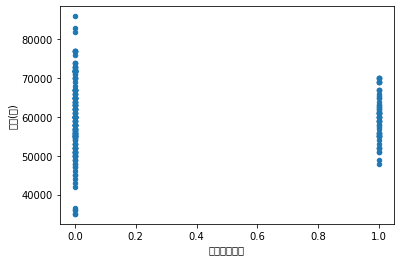

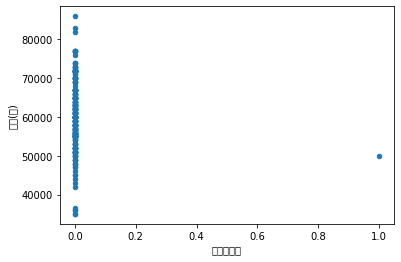

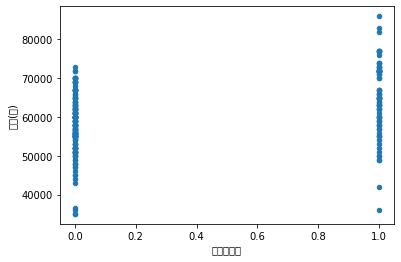

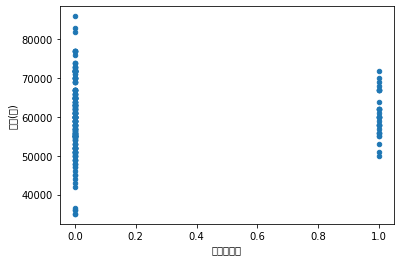

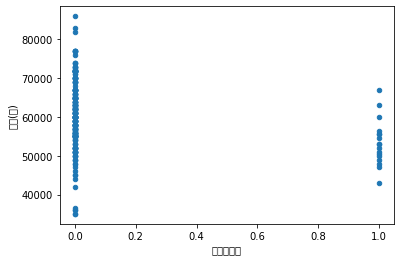

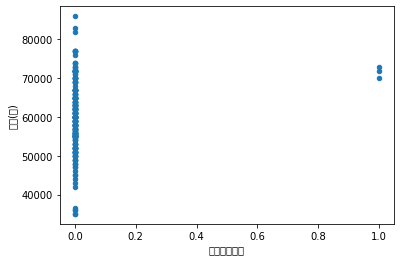

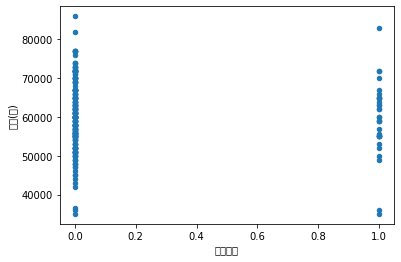

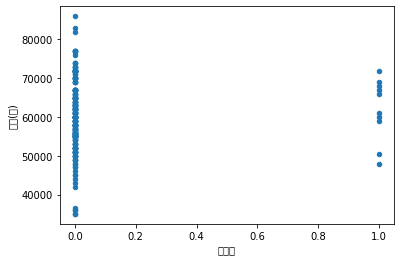

In [30]:
no = x_train[(x_train['家賃(円)'] < 30000) & (x_train['駅徒歩分'] > 8)].index
x_train2 = x_train.drop(no,axis =0)
for name in x_train2:
  x_train2.plot(kind='scatter',x = name, y = '家賃(円)')


## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

In [33]:
train_cor = x_train2.corr()['家賃(円)']
train_cor2 = train_cor.map(abs)
train_cor2.sort_values(ascending=False)

家賃(円)     1.000000
市川市新田     0.380092
市川市市川     0.296105
市川市菅野     0.218424
礼金(か月）    0.214432
敷金(か月)    0.213022
南東        0.208666
1R        0.208278
市川市大洲     0.176229
1K        0.150938
市川市須和田    0.146138
東         0.102453
市川市平田     0.076716
南         0.065320
西         0.049295
南西        0.047066
鉄骨造       0.040865
軽量鉄骨      0.038483
市川市大町     0.035913
北東        0.034506
市川市真間     0.012134
市川市市川南    0.010736
面積(㎡)          NaN
築年数(年)         NaN
駅徒歩分           NaN
Name: 家賃(円), dtype: float64

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [37]:
col = ['築年数(年)','面積(㎡)']
a = train_cor2[col]
b = train_cor2[['家賃(円)']]

train_cor2.head()


家賃(円)     1.000000
敷金(か月)    0.213022
礼金(か月）    0.214432
面積(㎡)          NaN
築年数(年)         NaN
Name: 家賃(円), dtype: float64

## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [42]:
x_train2,x_val2,y_train2,y_val2 = train_test_split(train_cor2,test_size = 0.2,random_state=0)

ValueError: ignored

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [43]:
from sklearn.preprocessing import StandardScaler
sc_mdl_x = StandardScaler()
sc_mdl_x.fit(x_train2)
sc_x = sc_mdl_x.transform(x_train2)

sc_mdl_y = StandardScaler()
sc_mdl_y.fit(y_train2)
sc_y = y_train2.transform(y_train2)

sc_x_value = sc_mdl_x.transform(x_val2)
sc_y_value = sc_mdl_y.transform(y_val2)

mdl = LinearRegression()
mdl.fit(sc_x,sc_y)
mdl.score(sc_x_value,sc_y_value)

ValueError: ignored

## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [44]:
test_data = [[3, 30]]
mdl.predict(test_data)

NameError: ignored

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

In [ ]:
t_data = test.fillna(training.mean())
t_data.isnull().sum()

x_test = t_data[ ]
y_test = t_data[['家賃(円)']]

x_test = sc_mdl_x.transform(x_test)
y_test = sc_mdly.transform(y_test)

mdl.score(x_test,y_test)


## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [ ]:
import pickle
with open('house_rent.pkl','wb') as f:
  pickle.dump(mdl,f)
with open('house_rent_scx.pki','wb') as f:
  pickle.dump(sc_mdl_x,f)
with open('house_rent_scy.pki','wb') as f:
  pickle.dump(sc_mdl_y,f)